## Differential fluxes analysis: Human vs Diary vs bioethanol vs wild type
- transcriptome-constrained ssGEMs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set the working directory
os.chdir(r'D:\code\github\Unified_Yeast_GEMs_Database')

In [2]:
# load transcriptome-constrained fluxes data
# df_fluxes=pd.read_csv(r'code/6.transcriptomics_ssGEMs_analysis/output/new2_0.001_tissGEMs_pfba_fluxes.csv',index_col=0)
# df_fluxes=pd.read_csv(r'code/human_dairy_analysis/output/human_dairy_bioethanol_ssGEMs_fluxes.csv',index_col=0)
# df_fluxes=pd.read_csv(r'code/6.transcriptomics_ssGEMs_analysis/RIPTiDe_integrate_transcriptome/output/allssGEMs_riptide_growth0.1_ethanol10_mean_flux.csv',index_col=0)
# df_fluxes=pd.read_csv(r'code/6.transcriptomics_ssGEMs_analysis/RIPTiDe_integrate_transcriptome/output/humandairy_riptide_growth0.2_ethanol5_mean_flux.csv',index_col=0)
# df_fluxes=pd.read_csv(r'code/6.transcriptomics_ssGEMs_analysis/RIPTiDe_integrate_transcriptome/output/humandairy_riptide_growth0.85_ethanolyield0.25_mean_flux.csv',index_col=0)
# df_fluxes=pd.read_csv(r'code/6.transcriptomics_ssGEMs_analysis/RIPTiDe_integrate_transcriptome/output/humandairy_riptide_growth0.5_ethanolyield0.15_mean_flux.csv',index_col=0)
df_fluxes=pd.read_csv(r'code/6.transcriptomics_ssGEMs_analysis/RIPTiDe_integrate_transcriptome/output/humandairy_riptide_growth0.7_ethanolyield0.18_mean_flux.csv',index_col=0)

# remove columns with 0 value in the row named 'growth'
# fill the NaN with 0
df_fluxes=df_fluxes.fillna(0)
growth='r_2111'
df_fluxes=df_fluxes.loc[:,(df_fluxes.loc[growth,:]!=0)]
available_strains=df_fluxes.columns.tolist()
df_fluxes.head()

,BGN_1.re,CNI_4.re,CNP_1.re,CNH_4.re,BAI_7.re,CNR_1.re,CDF_1.re,AQM_4.re,YCR.re,AHC_2.re,...,CNE_4.re,BCM_8.re,BAP_7.re,BVG_4.re,ARR_6.re,BGL_1.re,BGD_8.re,AGR_2.re,BAN_7.re,CCN_1.re
r_0001,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
r_0002,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
r_0003,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-0.395488,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
r_0004,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
r_0005,0.81935,0.250954,0.356692,0.386357,0.594237,0.330655,0.434762,0.820918,0.36444,0.338491,...,0.458988,0.618038,0.624937,0.343989,0.557086,0.69999,0.672852,0.703472,0.741315,0.510717


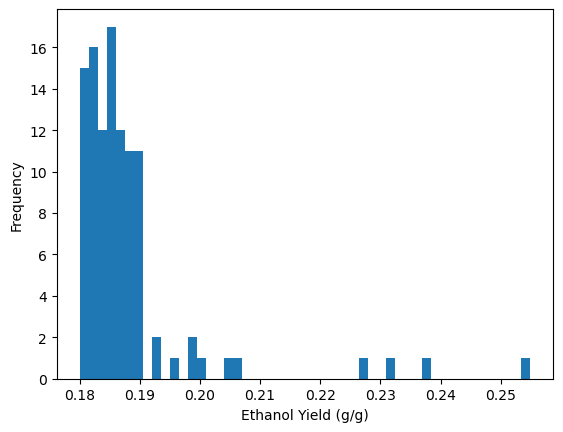

In [3]:
# calculate the Ethanol yield
ethanol_products=df_fluxes.loc['r_1761']
gluc_uptakes=df_fluxes.loc['r_1714']
yields=-ethanol_products/gluc_uptakes*46/180
yields
# plot yields distribution
plt.hist(yields,bins=50)
plt.xlabel('Ethanol Yield (g/g)')
plt.ylabel('Frequency')
plt.show()

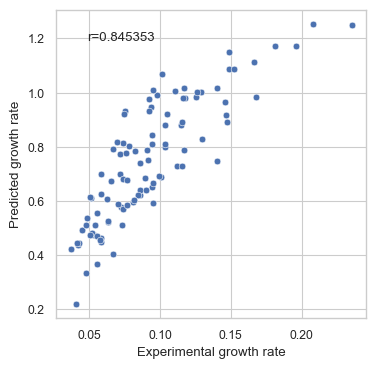

In [6]:
# evaluate the predicted growth rate with the experimental data
pre_growth = df_fluxes.loc[growth, :]
# remove 0 value
pre_growth = pre_growth[pre_growth != 0]
# load experimental growth rate
# load growth data
df_exp_data = pd.read_csv('data/transcriptomics/combined_969growth_data.csv', index_col=0)
# remove rows with genome_id is NaN
df_exp_data = df_exp_data[df_exp_data['genome_id'].notnull()]
# set genome_id as index
df_exp_data = df_exp_data.set_index('genome_id')
exp_growth = df_exp_data['t_mid_norm']

df_growth=pd.DataFrame(index=pre_growth.index)
df_growth['pre']=pre_growth
df_growth['exp']=df_growth.index.map(exp_growth)
# remove rows with NaN
df_growth=df_growth[df_growth['exp'].notnull()]
# remove predicted growth rate < 0.15
# df_growth=df_growth[df_growth['pre']>0.15]
df_growth['exp']=1/df_growth['exp']

# plot the predicted vs experimental growth rate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.set_context('paper')
plt.figure(figsize=(4,4))
sns.scatterplot(x='exp',y='pre',data=df_growth)
plt.xlabel('Experimental growth rate')
plt.ylabel('Predicted growth rate')
# calculate the correlation coefficient
from scipy.stats import pearsonr
r,p=pearsonr(df_growth['exp'],df_growth['pre'])
plt.text(0.1,0.9,'r=%f' %r,transform=plt.gca().transAxes)
plt.show()

In [66]:

# # save growth result
df_growth.to_csv(r'code/7.human_diary_ethanol_analysis/output/predicted_vs_experimental_growth_rate.csv')

In [4]:
#load strainlist
df_strain_info=pd.read_excel('data/1897_strains_info.xlsx',index_col=0)
wildtypelist=['14. CHNIII ','20. CHN V ', '15. CHNII ','17. Taiwanese ', '24. Asian islands ', '18. Far East Asia ', '19. Malaysian ', '22. Far East Russian ']
# wildtypelist=['14. CHNIII ','20. CHN V ', '15. CHNII ','17. Taiwanese ']
wt_strainList=df_strain_info[(df_strain_info['nature_clade'].isin(wildtypelist)) & (df_strain_info['type']=='Wild')].index.tolist() 
bioethanol_strainList=df_strain_info[(df_strain_info['nature_clade']=='3. Brazilian bioethanol ') & (df_strain_info['type']=='Industry')].index.tolist()
human_strainList=df_strain_info[(df_strain_info['nature_clade']=='10. French Guiana human ')&(df_strain_info['type']=='Human')].index.tolist()
dairy_strainList=df_strain_info[(df_strain_info['nature_clade']=='5. French dairy ')&(df_strain_info['type']=='Fermentation')].index.tolist()

# only keep the strains in available_strains
wt_strainList=[i for i in wt_strainList if i in available_strains]
bioethanol_strainList=[i for i in bioethanol_strainList if i in available_strains]
human_strainList=[i for i in human_strainList if i in available_strains]
dairy_strainList=[i for i in dairy_strainList if i in available_strains]

bioethanol_fluxes=df_fluxes[bioethanol_strainList]
human_fluxes=df_fluxes[human_strainList]
dairy_fluxes=df_fluxes[dairy_strainList]
wt_fluxes=df_fluxes[wt_strainList]

In [7]:
df_growth['Type']=df_growth.index.map(lambda x: df_strain_info.loc[x,'nature_clade'])
df_growth['Type']=df_growth['Type'].map(lambda x: 'Wild-type' if x in wildtypelist else x)
df_growth['Type']=df_growth['Type'].map(lambda x: 'Bioethanol' if x=='3. Brazilian bioethanol ' else x)
df_growth['Type']=df_growth['Type'].map(lambda x: 'Human' if x=='10. French Guiana human ' else x)
df_growth['Type']=df_growth['Type'].map(lambda x: 'Dairy' if x=='5. French dairy ' else x)
df_growth
# save growth result
# df_growth.to_csv(r'code/7.human_diary_ethanol_analysis/output/predicted_vs_experimental_growth_rate.csv')

,pre,exp,Type
BGN_1.re,1.086192,0.148353,Dairy
CNI_4.re,0.332683,0.047656,Bioethanol
CNP_1.re,0.472857,0.053738,Bioethanol
CNH_4.re,0.512183,0.054054,Bioethanol
BAI_7.re,0.787765,0.090753,Wild-type
...,...,...,...
BVG_4.re,0.456017,0.057813,Bioethanol
BGD_8.re,0.891983,0.147302,Dairy
AGR_2.re,0.932575,0.092087,Wild-type
BAN_7.re,0.982743,0.167500,Wild-type


### 1. fluxes cluster analysis

In [8]:
# combine bioethanol,wt,human,dairy fluxes into one dataframe
df_fluxes_combined=pd.concat([bioethanol_fluxes,human_fluxes,dairy_fluxes,wt_fluxes],axis=1).T

# normolize each rows by r_1714 column
df_fluxes_combined=df_fluxes_combined.div(df_fluxes_combined['r_1714'],axis=0)*-1

# remove columns with all NaN values
df_fluxes_combined=df_fluxes_combined.dropna(axis=1,how='all')
# set all Nan values to 0
df_fluxes_combined=df_fluxes_combined.fillna(0)
# remove columns with all 0 values
df_fluxes_combined=df_fluxes_combined.loc[:,(df_fluxes_combined!=0).any(axis=0)]
# remove all columns with any value 's absolute value larger than 10
# df_fluxes_combined=df_fluxes_combined.loc[:,(df_fluxes_combined.abs()<=10).all()]

# add label
df_fluxes_combined['Type']=''
df_fluxes_combined.loc[bioethanol_strainList,'Type']='Bioethanol'
df_fluxes_combined.loc[human_strainList,'Type']='Human'
df_fluxes_combined.loc[dairy_strainList,'Type']='Dairy'
df_fluxes_combined.loc[wt_strainList,'Type']='Wildtype'
df_fluxes_combined.head()

,r_0003,r_0005,r_0006,r_0007,r_0014,r_0015,r_0016,r_0018,r_0020,r_0023,...,r_4591,r_4592,r_4593,r_4594,r_4595,r_4596,r_4597,r_4598,r_4599,Type
AFR_5.re,-0.225287,0.023790,0.007949,0.002444,0.000032,0.000032,0.007224,0.011668,0.011071,-0.010762,...,0.000024,0.000039,-0.000080,-0.000021,-0.000086,-0.000024,-0.000039,0.031538,0.031538,Bioethanol
BVC_6.re,0.000000,0.016054,0.005364,0.018679,0.000021,0.000021,0.010902,0.017047,0.018619,-0.014176,...,0.000016,0.000026,-0.000054,-0.000014,-0.000058,-0.000016,-0.000026,0.021282,0.021282,Bioethanol
AEG_8.re,0.000000,0.024403,0.008153,0.011704,0.000032,0.000032,0.014991,0.022370,0.019877,-0.022489,...,0.000024,0.000040,-0.000082,-0.000021,-0.000088,-0.000024,-0.000040,0.032350,0.032350,Bioethanol
AGM_1.re,0.000000,0.023571,0.007876,0.002420,0.000031,0.000031,0.007351,0.010315,0.009649,-0.010529,...,0.000023,0.000039,-0.000080,-0.000021,-0.000085,-0.000023,-0.000039,0.031248,0.031248,Bioethanol
CNQ_1.re,-0.255687,0.024225,0.008094,0.002454,0.000032,0.000032,0.007518,0.011646,0.010783,-0.011227,...,0.000024,0.000040,-0.000082,-0.000021,-0.000088,-0.000024,-0.000040,0.032114,0.032114,Bioethanol


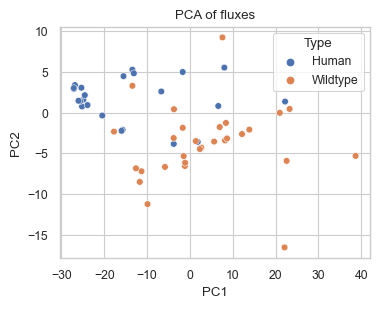

In [70]:
# PCA analysis for fluxes
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
# only keep the Human and Wildtype
# df_fluxes_combined=df_fluxes_combined[df_fluxes_combined['Type'].isin(['Human','Wildtype'])]
df_fluxes_combined=df_fluxes_combined[df_fluxes_combined['Type'].isin(['Human','Dairy','Wildtype','Bioethanol'])]
x1 = StandardScaler().fit_transform(df_fluxes_combined.drop('Type',axis=1))

# PCA
pca1 = PCA(n_components=2)
principalComponents1 = pca1.fit_transform(x1)

# plot
fig,ax=plt.subplots(figsize=(4,3))
# plot geneMatrix
pca_fluxes=pd.DataFrame(principalComponents1,columns=['PC1','PC2'])

pca_fluxes['Type']=df_fluxes_combined['Type'].values
# remove PC2 >30
pca_fluxes=pca_fluxes[pca_fluxes['PC2']<10]
sns.scatterplot(x='PC1',y='PC2',hue='Type',data=pca_fluxes.loc[pca_fluxes['Type'].isin(['Human','Wildtype',])],ax=ax)
# sns.scatterplot(x='PC1',y='PC2',hue='Type',data=pca_fluxes.loc[pca_fluxes['Type'].isin(['Wildtype','Bioethanol'])],ax=ax)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
# set title
ax.set_title('PCA of fluxes')
# set 
plt.show()

In [71]:
pca_fluxes.to_csv(r'code/7.human_diary_ethanol_analysis/output/pca_fluxes.csv')

#### Random forest classifier capture ther feature reaction to classify strain type

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

def random_forest():
    parameters = {
                    'max_features':['sqrt','log2'],'n_estimators':[10,100,500,1000]
    }
    rf = RandomForestClassifier()
    model=GridSearchCV(rf,parameters,n_jobs=1,cv=5)      #optimize the parameters
    return model

def do_cross_validation(X,y,model):
    '''do cross validation to evaluate the model'''
    scores = cross_val_score(model,X,y,scoring='accuracy',cv=5,n_jobs=1)
    print('mean score:',np.mean(scores),'std:',np.std(scores))
    return str(np.mean(scores))+','+str(np.std(scores))+'\n'

def extract_feature_importance(model,data):
    '''extract feature importance from model'''
    feature_importance = model.best_estimator_.feature_importances_
    feature_importance = pd.DataFrame(feature_importance,index=data.drop(columns=["Type"]).columns,columns=["importance"])
    feature_importance.sort_values(by="importance",ascending=False,inplace=True)
    feature_importance=feature_importance["importance"]
    
    return feature_importance

def run_random_forest(data):
    y=list(data["Type"])
    x=data.drop(columns=["Type"])
    model=random_forest()
    model.fit(x,y)
    score=do_cross_validation(x,y,model)
    feature_importance=extract_feature_importance(model,data)
    return score,feature_importance

In [73]:
human_wt_fluxes=df_fluxes_combined[df_fluxes_combined['Type'].isin(['Human','Wildtype'])]
diary_wt_fluxes=df_fluxes_combined[df_fluxes_combined['Type'].isin(['Dairy','Wildtype'])]
ethanol_wt_fluxes=df_fluxes_combined[df_fluxes_combined['Type'].isin(['Bioethanol','Wildtype'])]

human_score,human_feature_importance=run_random_forest(human_wt_fluxes)
diary_score,diary_feature_importance=run_random_forest(diary_wt_fluxes)
ethanol_score,ethanol_feature_importance=run_random_forest(ethanol_wt_fluxes)

mean score: 0.8545454545454545 std: 0.10909090909090907
mean score: 0.8254545454545456 std: 0.07614687851407972
mean score: 0.65 std: 0.097182531580755


In [74]:
def get_top_feature(feature,top,model):
    feature=pd.DataFrame(feature)
    top_feature=feature.head(top)
    # print(top_feature)
    rxnNames=list()
    for rxn in top_feature.index:
        rxnNames.append(model.reactions.get_by_id(rxn).name)
    top_feature['name']=rxnNames

    # sort as ascending order
    top_feature=top_feature.sort_values(by='importance',ascending=True)

    return top_feature


def plot_feature(top_feature,title,xmin=None,xmax=None):
    '''plot the top feature importance'''
    # plot the scatter plot of feature importance
    fig,ax=plt.subplots(figsize=(2,3))
    # remove vertical gridlines
    ax.xaxis.grid(False)
    # set y grid as dashed
    ax.yaxis.grid(True,linestyle='--')
    # set the plot direction as horizontal,set the marker,set edge linewidth
    sns.scatterplot(x=top_feature['importance'],
                y=np.arange(top_feature.shape[0]),
                ax=ax,
                markers='o',edgecolor='black',color='grey',linewidth=1,s=30)

    ax.set_yticks([])
    # set title
    ax.set_title(title)
    # set x label
    ax.set_xlabel('Feature importance')
    # plot dashed line plot 
    for i in range(top_feature.shape[0]):
        ax.plot([0,1],
                [i,i],
                '--',linewidth=1,color='grey',alpha=0.5)
    # set x lim
    if xmin is not None and xmax is not None:
        ax.set_xlim(xmin,xmax)
    ax.set_ylim(-0.5,10)
    # text the rxn name
    for i in range(top_feature.shape[0]):
        rxnName=top_feature['name'][i]
        if len(rxnName)>40:
            rxnName=rxnName.split('(')[0].strip()
        ax.text(x=0.001, 
                y=i+0.2, 
                s=rxnName,
                fontsize=6,color='black')
    plt.show()

        
import cobra
model=cobra.io.read_sbml_model(r'model/panYeast.xml')

'' is not a valid SBML 'SId'.


C:\Users\wangh\AppData\Local\Temp\ipykernel_20016\2332927112.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_feature['name']=rxnNames
C:\Users\wangh\AppData\Local\Temp\ipykernel_20016\2332927112.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rxnName=top_feature['name'][i]


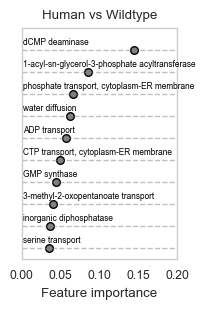

In [77]:
human_top_feature=get_top_feature(human_feature_importance,10,model)

plot_feature(human_top_feature,'Human vs Wildtype',0,0.2)

C:\Users\wangh\AppData\Local\Temp\ipykernel_20016\2332927112.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_feature['name']=rxnNames
C:\Users\wangh\AppData\Local\Temp\ipykernel_20016\2332927112.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rxnName=top_feature['name'][i]


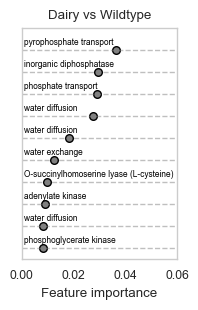

In [81]:
diary_top_feature=get_top_feature(diary_feature_importance,10,model)
plot_feature(diary_top_feature,'Dairy vs Wildtype',0,0.06)

C:\Users\wangh\AppData\Local\Temp\ipykernel_20016\2332927112.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_feature['name']=rxnNames
C:\Users\wangh\AppData\Local\Temp\ipykernel_20016\2332927112.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rxnName=top_feature['name'][i]


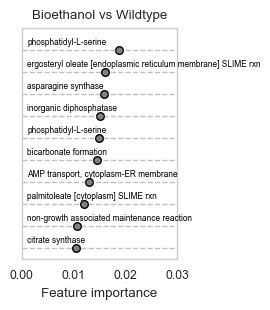

In [79]:
bioethanol_top_feature=get_top_feature(ethanol_feature_importance,10,model)
plot_feature(bioethanol_top_feature,'Bioethanol vs Wildtype',0,0.03)

In [82]:
# save 3 top feature importance into one excel file
with pd.ExcelWriter(r'code/7.human_diary_ethanol_analysis/output/humandairyethanol_top_feature.xlsx') as writer:
    human_top_feature.to_excel(writer,sheet_name='Human')
    diary_top_feature.to_excel(writer,sheet_name='Dairy')
    bioethanol_top_feature.to_excel(writer,sheet_name='Bioethanol')

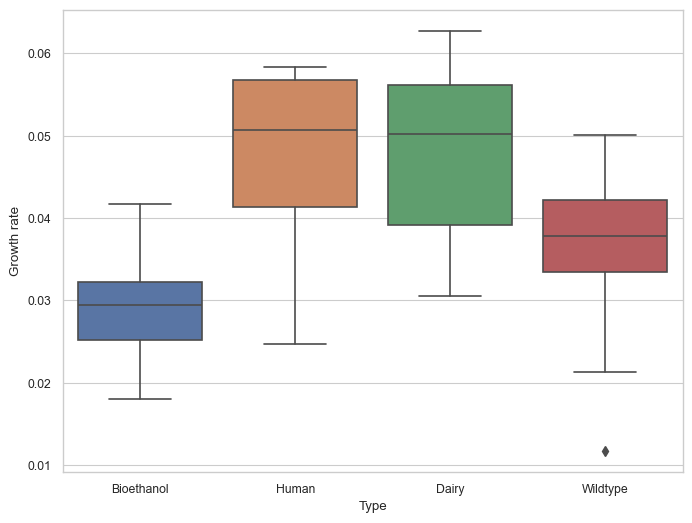

Bioethanol TtestResult(statistic=-3.9149609509621492, pvalue=0.0002403918383671886, df=58.0)
Human TtestResult(statistic=4.6589438652544075, pvalue=2.2429320636022343e-05, df=52.0)
Dairy TtestResult(statistic=4.561784332882484, pvalue=3.3104299821227646e-05, df=50.0)
Wildtype TtestResult(statistic=0.0, pvalue=1.0, df=58.0)


In [83]:
# compare the different growth rate for different Type
fig,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x='Type',y=growth,data=df_fluxes_combined,ax=ax)
# plot violinplot, and show the point
# sns.violinplot(x='Type',y='growth',data=df_fluxes_combined,ax=ax,inner=None)
# sns.swarmplot(x='Type',y='growth',data=df_fluxes_combined,ax=ax,color='k',alpha=0.5)
ax.set_xlabel('Type')
ax.set_ylabel('Growth rate')
plt.show()
# calculate the significance of the difference of each type to the wildtype
from scipy.stats import ttest_ind
for i in df_fluxes_combined['Type'].unique():
    print(i,ttest_ind(df_fluxes_combined[df_fluxes_combined['Type']==i][growth],df_fluxes_combined[df_fluxes_combined['Type']=='Wildtype'][growth]))

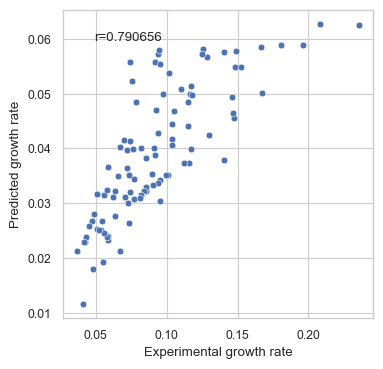

In [84]:
# calculate the correlation coefficient between growth rate and fluxes
# evaluate the predicted growth rate with the experimental data
pre_growth = df_fluxes_combined.T.loc['r_2111', :]
# remove 0 value
pre_growth = pre_growth[pre_growth != 0]
# load experimental growth rate
# load growth data
df_exp_data = pd.read_csv('data/transcriptomics/combined_969growth_data.csv', index_col=0)
# remove rows with genome_id is NaN
df_exp_data = df_exp_data[df_exp_data['genome_id'].notnull()]
# set genome_id as index
df_exp_data = df_exp_data.set_index('genome_id')
exp_growth = df_exp_data['t_mid_norm']

df_growth=pd.DataFrame(index=pre_growth.index)
df_growth['pre']=pre_growth
df_growth['exp']=df_growth.index.map(exp_growth)
# remove rows with NaN
df_growth=df_growth[df_growth['exp'].notnull()]
# remove predicted growth rate < 0.15
# df_growth=df_growth[df_growth['pre']>0.15]
df_growth['exp']=1/df_growth['exp']

# plot the predicted vs experimental growth rate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.set_context('paper')
plt.figure(figsize=(4,4))
sns.scatterplot(x='exp',y='pre',data=df_growth)
plt.xlabel('Experimental growth rate')
plt.ylabel('Predicted growth rate')
# calculate the correlation coefficient
from scipy.stats import pearsonr
r,p=pearsonr(df_growth['exp'],df_growth['pre'])
plt.text(0.1,0.9,'r=%f' %r,transform=plt.gca().transAxes)
plt.show()

In [85]:
# compare the different experimental growth rate for different Type
# load data
#load experimental data
df_exp_data=pd.read_csv('data/transcriptomics/combined_969growth_data.csv',index_col=0)
# remove rows with genome_id is NaN
df_exp_data=df_exp_data[df_exp_data['genome_id'].notnull()]
#set genome_id as index
df_exp_data=df_exp_data.set_index('genome_id')
df_exp_data=df_exp_data.loc[df_exp_data.index.isin(df_fluxes_combined.index.tolist()),:]
df_exp_data['Type']=df_fluxes_combined['Type']
df_exp_data.head()

,matrix,OD,t_mid_norm,col_OD_batch,Plate_number,YPD_colony_size,Type
genome_id,,,,,,,
MAL.re,M2-1 D06,0.120507,15.273261,1.0,1.0,290.97,Wildtype
AQM_4.re,M2-1 E11,0.123649,6.576459,1.0,1.0,853.47,Dairy
BDR_6.re,M2-3 B11,0.118567,6.004310,1.0,1.0,767.03,Human
BCM_8.re,M2-3 C04,0.153129,14.329030,1.0,1.0,371.69,Human
BCB_3.re,M2-3 D03,0.118470,7.772070,1.0,1.0,485.25,Human


### 2.specific pathway fluxes analysis

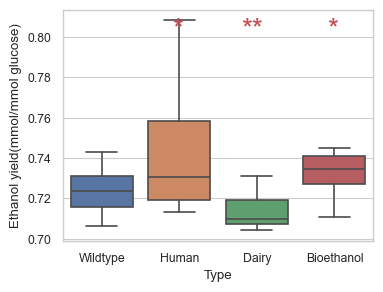

In [9]:
# normalize the flux
# df_fluxes_combined=df_fluxes_combined.div(df_fluxes_combined['r_1714'],axis=1)*(-100)
ethanol='r_1761'
# sort df_fluxes_combined by type
df_fluxes_combined=df_fluxes_combined.sort_values('Type',ascending=False)
# calculate p value of ethanol production of each type to the wildtype
from scipy.stats import ttest_ind
p_dict={}
for i in df_fluxes_combined['Type'].unique():
    p_dict[i]=ttest_ind(df_fluxes_combined[df_fluxes_combined['Type']==i][ethanol],df_fluxes_combined[df_fluxes_combined['Type']=='Wildtype'][ethanol])[1]

# plot the ethanol production for differet type
fig,ax=plt.subplots(figsize=(4,3))
# plot the box plot, and not show outliers
sns.boxplot(x='Type',y=ethanol,data=df_fluxes_combined,ax=ax,showfliers=False)
ax.set_xlabel('Type')
ax.set_ylabel('Ethanol yield(mmol/mmol glucose)')
# add p value, if p<0.05, add '*' if p<0.01, add '**'
for i in range(len(df_fluxes_combined['Type'].unique())):
    if p_dict[df_fluxes_combined['Type'].unique()[i]]<0.01:
        ax.text(i-0.2,0.8,'**',fontsize=20,color='r')
    elif p_dict[df_fluxes_combined['Type'].unique()[i]]<0.05:
        ax.text(i-0.1,0.8,'*',fontsize=20,color='r')
plt.show()

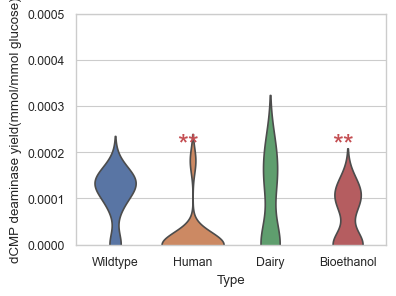

In [20]:
# normalize the flux
# df_fluxes_combined=df_fluxes_combined.div(df_fluxes_combined['r_1714'],axis=1)*(-100)
target='r_0326'
target_name='dCMP deaminase'
# sort df_fluxes_combined by type
df_fluxes_combined=df_fluxes_combined.sort_values('Type',ascending=False)
# calculate p value of target production of each type to the wildtype
from scipy.stats import ttest_ind
p_dict={}
for i in df_fluxes_combined['Type'].unique():
    p_dict[i]=ttest_ind(df_fluxes_combined[df_fluxes_combined['Type']==i][target],df_fluxes_combined[df_fluxes_combined['Type']=='Wildtype'][target])[1]

# plot the target production for differet type
fig,ax=plt.subplots(figsize=(4,3))
# plot the box plot, and not show outliers
# sns.boxplot(x='Type',y=target,data=df_fluxes_combined,ax=ax,showfliers=True)
# plot violinplot, and show the point,and set the min value
sns.violinplot(x='Type',y=target,data=df_fluxes_combined,ax=ax,inner=None,showmeans=True)
# sns.swarmplot(x='Type',y=target,data=df_fluxes_combined,ax=ax,color='k',alpha=0.5)
# set y lim
ax.set_ylim(0,0.0005)
ax.set_xlabel('Type')
ax.set_ylabel(f'{target_name} yield(mmol/mmol glucose)')
#add p value, if p<0.05, add '*' if p<0.01, add '**'
for i in range(len(df_fluxes_combined['Type'].unique())):
    if p_dict[df_fluxes_combined['Type'].unique()[i]]<0.01:
        ax.text(i-0.2,0.0002,'**',fontsize=20,color='r')
    elif p_dict[df_fluxes_combined['Type'].unique()[i]]<0.05:
        ax.text(i-0.1,0.0002,'*',fontsize=20,color='r')
plt.show()


In [30]:
df_ethanol=df_fluxes_combined[[ethanol,'Type']]
df_ethanol.columns=['Ethanol','Type']
df_ethanol.to_csv(r'code/7.human_diary_ethanol_analysis/output/predicted_ethanol_production.csv')

In [8]:
# load mean flux data
flux_result=pd.read_csv('code/7.human_diary_ethanol_analysis/output/riptide_mean_flux_result.csv',index_col=0)
flux_pvalue=pd.read_csv('code/7.human_diary_ethanol_analysis/output/riptide_mean_flux_pvalue.csv',index_col=0)

In [9]:
downgly_rxnlist=['r_1054','r_0486','r_0892','r_0893','r_0366','r_0962','r_0961']
upgly_rxnlist=['r_0534','r_0467','r_0886','r_0450']
af_rxnlist=['r_0959','r_2115','r_0173']
tca_rxnlist=['r_0300','r_0280','r_0658','r_1022','r_1021','r_0451','r_0713']
op_rxnlist=['r_0773','r_0439','r_0438','r_0226']

In [11]:
# check Oxidative phosphorylation
print(flux_result.loc[upgly_rxnlist])
print(flux_pvalue.loc[upgly_rxnlist])

        bioethanol      human      dairy         wt
r_0534   73.750670  75.860687  77.804045  76.190618
r_0467   48.403965  61.949755  52.529161  56.473107
r_0886   55.478564  62.935789  56.438766  60.664876
r_0450   55.478564  62.935789  56.438766  60.664876
        bioethanol     human     dairy  wt
r_0534    0.518008  0.923110  0.610568   1
r_0467    0.009550  0.123836  0.180513   1
r_0886    0.012563  0.335571  0.029707   1
r_0450    0.012563  0.335571  0.029707   1


In [12]:
# check TCA cycle
print(flux_result.loc[tca_rxnlist])
print(flux_pvalue.loc[tca_rxnlist])

        bioethanol      human      dairy         wt
r_0300   48.320698  50.957860  44.283549  50.905650
r_0280   24.633476  19.709384  16.349784  42.024099
r_0658   39.269040  20.670268  33.539199  41.019779
r_1022   37.903371  40.105197  34.413241  41.234331
r_1021   38.319954  41.981229  35.038560  41.992266
r_0451   38.064046  40.402118  34.587567  41.430401
r_0713   48.320698  50.957860  44.283549  50.905650
        bioethanol     human     dairy  wt
r_0300    0.484931  0.988562  0.133231   1
r_0280    0.008746  0.001190  0.000487   1
r_0658    0.667939  0.000337  0.129949   1
r_1022    0.383652  0.761033  0.123726   1
r_1021    0.340859  0.997626  0.116269   1
r_0451    0.382457  0.782164  0.124523   1
r_0713    0.484931  0.988562  0.133231   1


In [13]:
# check the upgly rxn
print(flux_result.loc[upgly_rxnlist])
print(flux_pvalue.loc[upgly_rxnlist])

        bioethanol      human      dairy         wt
r_0534   73.750670  75.860687  77.804045  76.190618
r_0467   48.403965  61.949755  52.529161  56.473107
r_0886   55.478564  62.935789  56.438766  60.664876
r_0450   55.478564  62.935789  56.438766  60.664876
        bioethanol     human     dairy  wt
r_0534    0.518008  0.923110  0.610568   1
r_0467    0.009550  0.123836  0.180513   1
r_0886    0.012563  0.335571  0.029707   1
r_0450    0.012563  0.335571  0.029707   1


In [14]:
# check the downgly rxn
print(flux_result.loc[downgly_rxnlist])
print(flux_pvalue.loc[downgly_rxnlist])

        bioethanol       human       dairy          wt
r_1054   69.017315   71.201922   67.682025   71.338483
r_0486  150.196468  149.398527  145.390241  152.106798
r_0892  150.196468  149.398527  145.390241  152.106798
r_0893  133.962999  141.994809  130.928493  134.919367
r_0366  133.962999  141.994809  130.928493  134.919367
r_0962  128.799972  136.618635  125.761969  129.920864
r_0961   57.401336   60.731220   54.503897   59.980563
        bioethanol     human         dairy  wt
r_1054    0.028913  0.909380  2.398695e-04   1
r_0486    0.124777  0.052713  5.644416e-08   1
r_0892    0.124777  0.052713  5.644416e-08   1
r_0893    0.866316  0.046039  3.591082e-01   1
r_0366    0.866316  0.046039  3.591082e-01   1
r_0962    0.839769  0.058407  3.369597e-01   1
r_0961    0.475835  0.832610  2.055420e-01   1


In [15]:
# check the af rxn
print(flux_result.loc[af_rxnlist])
print(flux_pvalue.loc[af_rxnlist])

        bioethanol      human      dairy         wt
r_0959   37.321708  40.392104  35.767811  35.029458
r_2115   27.039538  26.217505  25.799237  26.777875
r_0173    8.054033  12.490963   9.893901   8.032284
        bioethanol     human     dairy  wt
r_0959    0.049056  0.001874  0.000002   1
r_2115    0.869084  0.607869  0.000250   1
r_0173    0.954698  0.011173  0.000030   1


In [25]:
# # normalize fluxes by each column divided by the r_1714 and then multiply 100
df_fluxes=df_fluxes.div(df_fluxes.loc['r_1714',:],axis=1)*(-100)

# fill nan values with 0
df_fluxes_combined=df_fluxes_combined.fillna(0)
# calculate the average fluxes for each type
df_fluxes_combined_mean=df_fluxes_combined.groupby('Type').mean()
df_fluxes_combined_mean

# calculate the standard deviation of fluxes for each type
df_fluxes_combined_std=df_fluxes_combined.groupby('Type').std()
df_fluxes_combined_std

# calculate the p value of each flux for each type vs wildtype
from scipy.stats import ttest_ind
p_value_df=pd.DataFrame(columns=df_fluxes_combined_mean.columns)
for i in df_fluxes_combined_mean.index:
    p_value_df.loc[i,:]=[ttest_ind(df_fluxes_combined[df_fluxes_combined['Type']==i][j],df_fluxes_combined[df_fluxes_combined['Type']=='Wildtype'][j])[1] for j in df_fluxes_combined_mean.columns]
p_value_df

In [26]:
# only keep columns with any p value less than 0.05
df_diff_fluxes_combined_mean=df_fluxes_combined_mean.loc[:,(p_value_df<0.05).any()]
df_diff_fluxes_combined_std=df_fluxes_combined_std.loc[:,(p_value_df<0.05).any()]
diff_p_value_df=p_value_df.loc[:,(p_value_df<0.05).any()]
df_fluxes_combined_mean=df_fluxes_combined_mean.T
df_diff_fluxes_combined_mean=df_diff_fluxes_combined_mean.T

In [27]:
df_data=pd.read_excel(r'model\yeast-GEM.xlsx',sheet_name='RXNS',index_col=1)
df_data.head()

d:\softwares\programming\anoconda\envs\gem\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,#,NAME,EQUATION,EC-NUMBER,GENE ASSOCIATION,LOWER BOUND,UPPER BOUND,OBJECTIVE,COMPARTMENT,MIRIAM,SUBSYSTEM,REPLACEMENT ID,NOTE,REFERENCE,CONFIDENCE SCORE
ID,,,,,,,,,,,,,,,
r_0001,NaN,(R)-lactate:ferricytochrome-c 2-oxidoreductase,(R)-lactate[c] + 2 ferricytochrome c[m] => 2 f...,1.1.2.4;1.1.99.-,(YDL174C and YEL039C) or (YDL174C and YJR048W)...,NaN,NaN,NaN,NaN,bigg.reaction/D_LACDcm;kegg.pathway/sce00620;k...,Pyruvate metabolism,NaN,MetaNetX ID curated (PR #220),NaN,2.0
r_0002,NaN,(R)-lactate:ferricytochrome-c 2-oxidoreductase,(R)-lactate[m] + 2 ferricytochrome c[m] => 2 f...,1.1.2.4;1.1.99.-,(YDL178W and YEL039C) or (YDL178W and YJR048W),NaN,NaN,NaN,NaN,bigg.reaction/D_LACDm;kegg.pathway/sce00620;ke...,Pyruvate metabolism,NaN,MetaNetX ID curated (PR #220),NaN,2.0
r_0003,NaN,"(R,R)-butanediol dehydrogenase","(R,R)-2,3-butanediol[c] + NAD[c] <=> (R)-aceto...",1.1.1.4,YAL060W,NaN,NaN,NaN,NaN,bigg.reaction/BTDD_RR;kegg.pathway/sce00650;ke...,Butanoate metabolism,NaN,NaN,NaN,2.0
r_0004,NaN,(S)-lactate:ferricytochrome-c 2-oxidoreductase,(S)-lactate[c] + 2 ferricytochrome c[m] => 2 f...,1.1.2.3,(YEL039C and YML054C) or (YJR048W and YML054C),NaN,NaN,NaN,NaN,bigg.reaction/L_LACD2cm;kegg.pathway/sce00620;...,Pyruvate metabolism,NaN,MetaNetX ID curated (PR #220),NaN,2.0
r_0005,NaN,"1,3-beta-glucan synthase",UDP-D-glucose[c] => (1->3)-beta-D-glucan[ce] +...,2.4.1.34,(YPR165W and YLR342W) or (YPR165W and YGR032W)...,NaN,NaN,NaN,NaN,kegg.pathway/sce00500;kegg.pathway/sce04011;ke...,Starch and sucrose metabolism,NaN,MetaNetX ID curated (PR #220),NaN,3.0


In [63]:
df_diff_rxn=df_data.loc[df_data.index.isin(df_diff_fluxes_combined_mean.index.tolist()),:]
# significant difference fluxes pathway enrichment analysis
(df_diff_rxn['SUBSYSTEM'].value_counts()/df_data['SUBSYSTEM'].value_counts()).sort_values(ascending=False).head(50)

SUBSYSTEM
Growth                                                 0.888889
Lysine metabolism                                      0.800000
Phenylalanine, tyrosine and tryptophan biosynthesis    0.714286
Histidine metabolism                                   0.692308
Folate biosynthesis                                    0.666667
Valine, leucine and isoleucine metabolism              0.652174
Arginine biosynthesis                                  0.636364
Riboflavin metabolism                                  0.625000
Porphyrin and chlorophyll metabolism                   0.588235
One carbon pool by folate                              0.583333
Pentose phosphate pathway                              0.562500
tRNA metabolism                                        0.500000
Oxidative phosphorylation                              0.466667
Transport [c, er]                                      0.433333
Glycine, serine and threonine metabolism               0.424242
Citrate cycle (TCA cycle)     

In [64]:
# add rxn information: subsystem, reaction name, reaction equation
# df_fluxes_combined_mean=df_fluxes_combined_mean.T
df_fluxes_combined_mean['subsystem']=df_data['SUBSYSTEM']
df_fluxes_combined_mean['name']=df_data['NAME']
df_fluxes_combined_mean['Equation']=df_data['EQUATION']
df_fluxes_combined_mean

df_diff_fluxes_combined_mean['subsystem']=df_data['SUBSYSTEM']
df_diff_fluxes_combined_mean['name']=df_data['NAME']
df_diff_fluxes_combined_mean['Equation']=df_data['EQUATION']
df_diff_fluxes_combined_mean

Type,Bioethanol,Diary,Human,Wildtype,subsystem,name,Equation
r_0003,-0.102247,-0.014878,0.000000,0.000000,Butanoate metabolism,"(R,R)-butanediol dehydrogenase","(R,R)-2,3-butanediol[c] + NAD[c] <=> (R)-aceto..."
r_0005,0.866605,1.103656,1.059714,0.919615,Starch and sucrose metabolism,"1,3-beta-glucan synthase",UDP-D-glucose[c] => (1->3)-beta-D-glucan[ce] +...
r_0006,0.289547,0.368750,0.354069,0.307259,Starch and sucrose metabolism,"1,6-beta-glucan synthase",UDP-D-glucose[c] => (1->6)-beta-D-glucan[ce] +...
r_0007,0.194212,0.147294,0.150713,0.165910,Histidine metabolism,1-(5-phosphoribosyl)-5-[(5-phosphoribosylamino...,1-(5-phospho-D-ribosyl)-5-[(5-phospho-D-ribosy...
r_0014,0.001149,0.001463,0.001405,0.001219,Riboflavin metabolism,"2,5-diamino-6-ribitylamino-4(3H)-pyrimidinone ...","2,5-diamino-6-(5-phosphono)ribitylamino-4(3H)-..."
...,...,...,...,...,...,...,...
r_4595,-0.003136,-0.003994,-0.003835,-0.003328,Exchange reaction,Mn(2+) exchange,Mn(2+)[e] <=>
r_4596,-0.000859,-0.001094,-0.001051,-0.000912,Exchange reaction,Zn(2+) exchange,Zn(2+)[e] <=>
r_4597,-0.001427,-0.001818,-0.001746,-0.001515,Exchange reaction,Mg(2+) exchange,Mg(2+)[e] <=>
r_4598,1.148836,1.463088,1.404836,1.219111,Growth,cofactor pseudoreaction,0.00019 coenzyme A[c] + 1e-05 FAD[c] + 0.00265...


In [65]:
# # save the fluxes data
# df_fluxes_combined_mean.to_excel(r'code\human_diary_analysis\output\fluxes_analysis_human_diary_bioethanol.xlsx')
# df_diff_fluxes_combined_mean.to_excel(r'code\human_diary_analysis\output\diff_fluxes_analysis_human_diary_bioethanol.xlsx')

In [66]:
# Citrate cycle (TCA cycle)
print(p_value_df[['r_0300','r_0658','r_1022','r_1021','r_0451','r_0713']])
df_fluxes_combined_mean[df_fluxes_combined_mean['subsystem']=='Citrate cycle (TCA cycle)']
# df_diff_fluxes_combined_mean.loc[['r_0300','r_0658','r_1022','r_1021','r_0451','r_0713']]

              r_0300    r_0658    r_1022    r_1021    r_0451    r_0713
Bioethanol  0.413932  0.607821  0.338019  0.299004  0.337166  0.413932
Diary       0.150606  0.142277  0.137026  0.129186  0.137884  0.150606
Human       0.994325  0.000335  0.750356  0.983901  0.770754  0.994325
Wildtype         1.0       1.0       1.0       1.0       1.0       1.0


Type,Bioethanol,Diary,Human,Wildtype,subsystem,name,Equation
r_0280,4.818798,3.260402,3.899189,8.317967,Citrate cycle (TCA cycle),cis-aconitate(3-) to isocitrate,cis-aconitate[m] + H2O[m] <=> isocitrate[m]
r_0300,9.475380,8.820786,10.073225,10.078346,Citrate cycle (TCA cycle),citrate synthase,acetyl-CoA[m] + H2O[m] + oxaloacetate[m] => ci...
r_0302,4.818798,3.260402,3.899189,8.317967,Citrate cycle (TCA cycle),citrate to cis-aconitate(3-),citrate[m] <=> cis-aconitate[m] + H2O[m]
r_0303,0.042341,0.525376,4.471214,0.425717,Citrate cycle (TCA cycle),"citrate to cis-aconitate(3-), cytoplasmic",citrate[c] <=> cis-aconitate[c] + H2O[c]
r_0451,7.466581,6.890007,7.987827,8.202276,Citrate cycle (TCA cycle),fumarase,fumarate[m] + H2O[m] <=> (S)-malate[m]
r_0452,0.635636,0.607327,0.831800,0.682511,Citrate cycle (TCA cycle),"fumarase, cytoplasmic",fumarate[c] + H2O[c] <=> (S)-malate[c]
r_0658,7.701860,6.679915,4.091722,8.117976,Citrate cycle (TCA cycle),isocitrate dehydrogenase (NAD+),isocitrate[m] + NAD[m] => 2-oxoglutarate[m] + ...
r_0659,0.016850,0.505400,4.392031,0.396281,Citrate cycle (TCA cycle),isocitrate dehydrogenase (NADP),isocitrate[c] + NADP(+)[c] <=> 2-oxoglutarate[...
r_0713,9.475380,8.820786,10.073225,10.078346,Citrate cycle (TCA cycle),malate dehydrogenase,(S)-malate[m] + NAD[m] <=> H+[m] + NADH[m] + o...
r_0714,-1.796515,-1.665430,-1.571676,-1.564535,Citrate cycle (TCA cycle),"malate dehydrogenase, cytoplasmic",(S)-malate[c] + NAD[c] <=> H+[c] + NADH[c] + o...


In [67]:
# Oxidative phosphorylation
print(p_value_df[['r_0773','r_0439','r_0438','r_0226']])
df_fluxes_combined_mean[df_fluxes_combined_mean['subsystem']=='Oxidative phosphorylation']
df_diff_fluxes_combined_mean.loc[['r_0773','r_0439','r_0438','r_0226']]

              r_0773    r_0439    r_0438    r_0226
Bioethanol   0.12121  0.003135  0.003135  0.005893
Diary        0.03998  0.000052  0.000052       0.0
Human       0.009369  0.000002  0.000002       0.0
Wildtype         1.0       1.0       1.0       1.0


Type,Bioethanol,Diary,Human,Wildtype,subsystem,name,Equation
r_0773,36.594014,35.248368,34.573489,40.549602,Oxidative phosphorylation,NADH:ubiquinone oxidoreductase,H+[m] + NADH[m] + ubiquinone-6[m] => NAD[m] + ...
r_0439,70.183447,70.347828,67.680673,78.817817,Oxidative phosphorylation,ubiquinol:ferricytochrome c reductase,2 ferricytochrome c[m] + 1.266 H+[m] + ubiquin...
r_0438,140.366894,140.695657,135.361347,157.635634,Oxidative phosphorylation,ferrocytochrome-c:oxygen oxidoreductase,ferrocytochrome c[m] + 1.266 H+[m] + 0.25 oxyg...
r_0226,101.602691,92.782915,89.255429,117.974996,Oxidative phosphorylation,ATP synthase,ADP[m] + 3 H+[c] + phosphate[m] => ATP[m] + 2 ...


In [68]:
# check Glycolysis / gluconeogenesis
print(p_value_df[['r_0534','r_0467','r_0886','r_0450','r_1054','r_0486','r_0892','r_0893','r_0366','r_0962','r_0961','r_0959','r_2115','r_0173']])
df_fluxes_combined_mean[df_fluxes_combined_mean['subsystem']=='Glycolysis / gluconeogenesis']
# p_value_df['r_0165']

              r_0534    r_0467    r_0886    r_0450    r_1054    r_0486  \
Bioethanol  0.380208  0.005595  0.005363  0.005363  0.004764  0.008117   
Diary       0.516399   0.22278  0.048693  0.048693  0.001241  0.000001   
Human       0.889705  0.136522  0.369209  0.369209  0.813028  0.027095   
Wildtype         1.0       1.0       1.0       1.0       1.0       1.0   

              r_0892    r_0893    r_0366    r_0962    r_0961    r_0959  \
Bioethanol  0.008117  0.653428  0.653428  0.631728  0.389316  0.072208   
Diary       0.000001  0.455238  0.455238  0.426334  0.234969       0.0   
Human       0.027095  0.050433  0.050433   0.06395  0.853272  0.002114   
Wildtype         1.0       1.0       1.0       1.0       1.0       1.0   

              r_2115    r_0173  
Bioethanol  0.930208  0.848962  
Diary       0.000174  0.000025  
Human       0.585576  0.011593  
Wildtype         1.0       1.0  


Type,Bioethanol,Diary,Human,Wildtype,subsystem,name,Equation
r_0165,0.376147,0.000000,0.268468,0.000000,Glycolysis / gluconeogenesis,mitochondrial alcohol dehydrogenase,acetaldehyde[m] + H+[m] + NADH[m] => ethanol[m...
r_0173,1.576925,1.971607,2.471652,1.591539,Glycolysis / gluconeogenesis,"aldehyde dehydrogenase (acetaldehyde, NADP)",acetaldehyde[c] + H2O[c] + NADP(+)[c] => aceta...
r_0366,26.216089,26.078312,28.068533,26.715740,Glycolysis / gluconeogenesis,enolase,2-phospho-D-glyceric acid[c] <=> H2O[c] + phos...
r_0450,10.859064,11.244930,12.438906,12.018208,Glycolysis / gluconeogenesis,fructose-bisphosphate aldolase,"D-fructose 1,6-bisphosphate[c] <=> dihydroxyac..."
r_0467,9.472219,10.467786,12.243404,11.190519,Glycolysis / gluconeogenesis,glucose-6-phosphate isomerase,D-glucose 6-phosphate[c] <=> D-fructose 6-phos...
r_0486,29.405461,28.962251,29.531614,30.125585,Glycolysis / gluconeogenesis,glyceraldehyde-3-phosphate dehydrogenase,glyceraldehyde 3-phosphate[c] + NAD[c] + phosp...
r_0534,14.434141,15.500241,14.996187,15.090337,Glycolysis / gluconeogenesis,hexokinase (D-glucose:ATP),ATP[c] + D-glucose[c] => ADP[c] + D-glucose 6-...
r_0884,0.033700,0.000000,0.000000,0.000000,Glycolysis / gluconeogenesis,phosphoenolpyruvate carboxykinase,ATP[c] + oxaloacetate[c] => ADP[c] + carbon di...
r_0886,10.859064,11.244930,12.438906,12.018208,Glycolysis / gluconeogenesis,phosphofructokinase,ATP[c] + D-fructose 6-phosphate[c] => ADP[c] +...
r_0887,2.732135,2.339853,1.732600,2.196476,Glycolysis / gluconeogenesis,phosphofructokinase (s7p),ATP[c] + sedoheptulose 7-phosphate[c] => ADP[c...


In [69]:
# check ethanol
print(p_value_df[['r_1761']])
df_fluxes_combined_mean.loc['r_1761']

              r_1761
Bioethanol  0.013327
Diary       0.000174
Human       0.055861
Wildtype         1.0


Type
Bioethanol              5.65269
Diary                  5.138606
Human                  5.454536
Wildtype               5.302521
subsystem     Exchange reaction
name           ethanol exchange
Equation         ethanol[e] => 
Name: r_1761, dtype: object

In [70]:
# Glycine, serine and threonine metabolism
print(p_value_df[['r_0091','r_0466','r_0888','r_1049']])
df_fluxes_combined_mean[df_fluxes_combined_mean['subsystem']=='Pentose phosphate pathway']
# p_value_df['r_0091']

              r_0091    r_0466    r_0888    r_1049
Bioethanol  0.010204  0.010204  0.045406  0.010131
Diary       0.471269  0.471269       0.0  0.474899
Human       0.051278  0.051278  0.000006  0.052715
Wildtype         1.0       1.0       1.0       1.0


Type,Bioethanol,Diary,Human,Wildtype,subsystem,name,Equation
r_0091,8.201788,7.027523,5.196897,6.594479,Pentose phosphate pathway,6-phosphogluconolactonase,"6-O-phosphono-D-glucono-1,5-lactone[c] + H2O[c..."
r_0466,8.201788,7.027523,5.196897,6.594479,Pentose phosphate pathway,glucose 6-phosphate dehydrogenase,D-glucose 6-phosphate[c] + NADP(+)[c] => 6-O-p...
r_0888,1.734676,2.209179,2.121221,1.840787,Pentose phosphate pathway,phosphoglucomutase,D-glucose 6-phosphate[c] <=> D-glucose 1-phosp...
r_0889,8.201788,7.027523,5.196897,6.594479,Pentose phosphate pathway,phosphogluconate dehydrogenase,6-phospho-D-gluconate[c] + NADP(+)[c] => carbo...
r_0916,0.525260,0.519478,0.526460,0.498152,Pentose phosphate pathway,phosphoribosylpyrophosphate synthetase,ATP[c] + ribose-5-phosphate[c] => AMP[c] + H+[...
r_0982,3.257397,2.859333,2.259456,2.694416,Pentose phosphate pathway,ribose-5-phosphate isomerase,D-ribulose 5-phosphate[c] <=> ribose-5-phospha...
r_0984,4.942093,4.165264,2.934631,3.897625,Pentose phosphate pathway,ribulose 5-phosphate 3-epimerase,D-ribulose 5-phosphate[c] <=> D-xylulose 5-pho...
r_1048,0.000000,0.000000,0.000392,-0.000219,Pentose phosphate pathway,transaldolase,glyceraldehyde 3-phosphate[c] + sedoheptulose ...
r_1049,2.732135,2.339853,1.732992,2.196258,Pentose phosphate pathway,transketolase 1,D-xylulose 5-phosphate[c] + ribose-5-phosphate...
r_1050,2.209946,1.825396,1.201626,1.701359,Pentose phosphate pathway,transketolase 2,D-erythrose 4-phosphate[c] + D-xylulose 5-phos...


In [72]:
print(p_value_df[['r_0468','r_0473']])
df_fluxes_combined_mean[df_fluxes_combined_mean['subsystem']=='Glycine, serine and threonine metabolism']


              r_0468    r_0473
Bioethanol  0.034291  0.034291
Diary       0.471205  0.471205
Human       0.491255  0.491255
Wildtype         1.0       1.0


Type,Bioethanol,Diary,Human,Wildtype,subsystem,name,Equation
r_0215,0.949779,0.843065,0.818851,0.848797,"Glycine, serine and threonine metabolism",aspartate kinase,ATP[c] + L-aspartate[c] => 4-phospho-L-asparta...
r_0219,0.949779,0.843065,0.818851,0.848797,"Glycine, serine and threonine metabolism",aspartate-semialdehyde dehydrogenase,4-phospho-L-aspartate[c] + H+[c] + NADPH[c] =>...
r_0309,0.024698,0.047588,0.042886,0.051578,"Glycine, serine and threonine metabolism",cystathionine beta-synthase,L-homocysteine[c] + L-serine[c] => H2O[c] + L-...
r_0501,0.256873,1.284338,0.000000,1.610831,"Glycine, serine and threonine metabolism",glycine cleavage system,"L-glycine[m] + NAD[m] + THF[m] => 5,10-methyle..."
r_0502,1.776914,3.514176,0.858268,4.357891,"Glycine, serine and threonine metabolism",glycine hydroxymethyltransferase,"L-serine[c] + THF[c] <=> 5,10-methylenetetrahy..."
r_0503,-0.256873,-1.284338,0.000003,-1.610831,"Glycine, serine and threonine metabolism",glycine hydroxymethyltransferase,"L-serine[m] + THF[m] <=> 5,10-methylenetetrahy..."
r_0505,7.434906,6.855271,7.987839,8.163401,"Glycine, serine and threonine metabolism",glycine-cleavage complex (lipoamide),dihydrolipoamide[m] + NAD[m] => H+[m] + lipoam...
r_0546,0.949779,0.843065,0.818851,0.848797,"Glycine, serine and threonine metabolism",homoserine dehydrogenase (NADH),H+[c] + L-aspartate 4-semialdehyde[c] + NADH[c...
r_0548,0.949765,0.799064,0.807427,0.845603,"Glycine, serine and threonine metabolism",homoserine kinase,ATP[c] + L-homoserine[c] => ADP[c] + H+[c] + O...
r_0689,0.959072,0.051996,0.000000,0.000000,"Glycine, serine and threonine metabolism",L-serine deaminase,L-serine[c] => ammonium[c] + pyruvate[c]
